# Terra's Orbit

<i>© Von P. Walden, Washington State University</i>

This notebook describes how to use the PyEphem module to calculate ephemeris data for NASA Terra's satellite.  It relies on up-to-date orbital "two-line element" (TLE) data from NORAD; http://celestrak.com/NORAD/elements/science.txt

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import ephem
from urllib.request import urlopen

# Obtain the most recent orbital "elements" data from NORAD auto-magically!
TLEs = urlopen('http://celestrak.com/NORAD/elements/science.txt').readlines()
for i,TLE in enumerate(TLEs):
    if TLE.decode('utf-8').count('TERRA'):
        l1 = TLEs[i].strip().decode('utf-8')
        l2 = TLEs[i+1].strip().decode('utf-8')
        l3 = TLEs[i+2].strip().decode('utf-8')
terra = ephem.readtle(l1,l2,l3)

In [3]:
TLEs

[b'AKEBONO (EXOS-D)        \r\n',
 b'1 19822U 89016A   19240.86576732  .00016140  79726-7  28215-3 0  9997\r\n',
 b'2 19822  75.0226  65.1943 1778883  42.1499 330.3384 11.98118129  4284\r\n',
 b'HST                     \r\n',
 b'1 20580U 90037B   19240.90843375  .00000356  00000-0  10683-4 0  9995\r\n',
 b'2 20580  28.4694 101.0085 0002735 169.0484 304.8111 15.09257773411655\r\n',
 b'POLAR                   \r\n',
 b'1 23802U 96013A   19241.26637474  .00000226  00000-0  00000+0 0  9999\r\n',
 b'2 23802  78.7011 254.0378 6626671 293.0402  12.5125  1.29845716112580\r\n',
 b'SWAS                    \r\n',
 b'1 25560U 98071A   19241.50090863  .00000015  00000-0  99994-5 0  9992\r\n',
 b'2 25560  69.8990  40.6622 0005700  44.8523 315.3093 14.93764999125495\r\n',
 b'ORSTED                  \r\n',
 b'1 25635U 99008B   19241.26378033  .00000093  00000-0  29792-4 0  9991\r\n',
 b'2 25635  96.4842 329.0105 0138074 205.2821 154.1578 14.48162297 82453\r\n',
 b'CXO                     \r\n',
 b'1 2

The TLE data format is explained here: https://en.wikipedia.org/wiki/Two-line_element_set

b'TERRA                   \r\n',
 b'1 25994U 99068A   19233.87854381 -.00000044  00000-0  22564-6 0  9997\r\n',
 b'2 25994  98.2014 307.4535 0001211 111.3085 248.8225 14.57116811 46541\r\n',


In [4]:
from datetime import datetime, timedelta

# Create datetimes for the next three days.
numberOfDays = 1
now = datetime.date(datetime.now())
midnight = datetime(now.year, now.month, now.day, 0, 0)
dt  = [midnight + timedelta(minutes=x) for x in range(0, numberOfDays*24*60, 1)]

# Compute ground track locations at each datetime
sublon, sublat = np.array([]), np.array([])
for date in dt:
    terra.compute(date)
    sublon = append(sublon, np.rad2deg(terra.sublong)+180.)
    sublat = append(sublat, np.rad2deg(terra.sublat))


/Users/vonw/anaconda3/envs/work/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


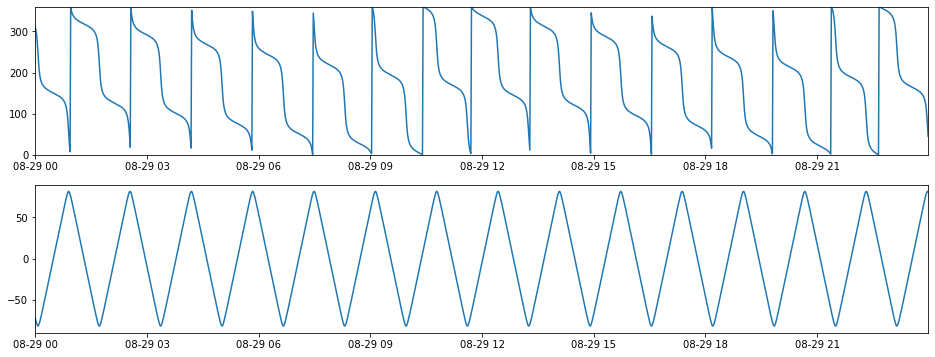

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize(16,6))
ax = plt.subplot(2,1,1)
ax.axis([min(dt), max(dt), 0, 360])
plot(dt,sublon)
ax = plt.subplot(2,1,2)
ax.axis([min(dt), max(dt), -90, 90])
plot(dt,sublat)

In [6]:
# Current location of satellite.
terra.compute(datetime.now())
x, y  = (sublon, sublat)
x2,y2 = (np.rad2deg(terra.sublong)+180.,np.rad2deg(terra.sublat))

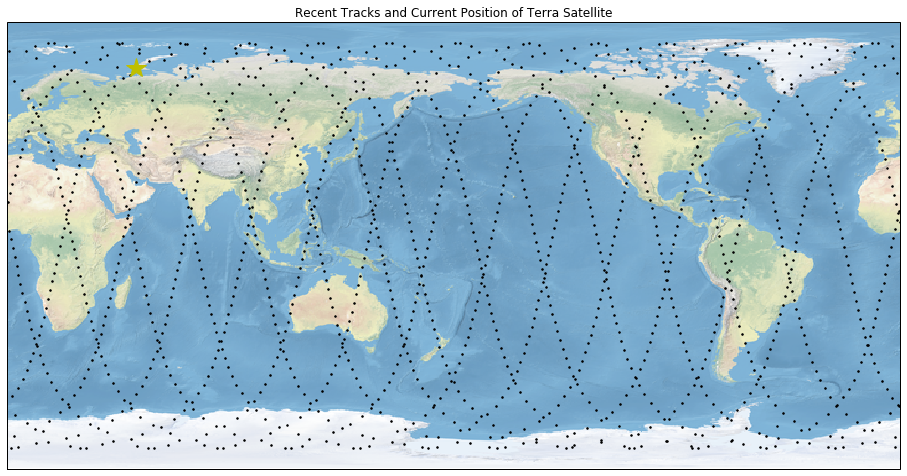

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))

ax.set_title('Recent Tracks and Current Position of Terra Satellite')
ax.stock_img()
ax.plot(x, y,'k.', markersize=3, transform=ccrs.PlateCarree())
ax.plot(x2, y2,'y*', markersize=20, transform=ccrs.PlateCarree())
plt.show()
